# **Machine learning**
## Underfitting and Overfitting


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

Vous avez vu dans les videos coursera la régression linéaire, une methode de résolution permettant de tracer une frontière (une droite) qui minimise la distance entre les points et cette droite.

Certains problèmes ne sont pas linéaires, il faut une courbe pour décrire les points de la distribution. Voici un exemple : 

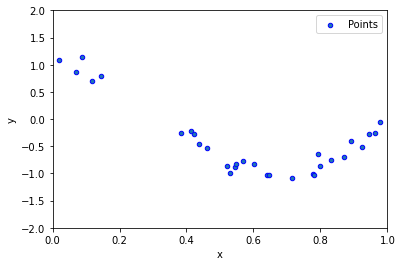

In [ ]:
def cosinus(X):
    return np.cos(1.5 * np.pi * X)

# Seeding
np.random.seed(0)

# Création de points provenant la fonction cosinus
nombre_de_points = 30
X = np.sort(np.random.rand(nombre_de_points))
bruit = np.random.randn(nombre_de_points) * 0.1
y = cosinus(X) + bruit

plt.scatter(X, y, edgecolor='b', s=20, label="Points")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.show()

Essayons de voir ce que donne une régression linéaire sur ce problème:

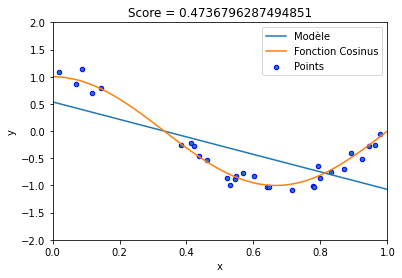

In [ ]:
x = X[:, np.newaxis] # changement de dimension (30,) à (30, 1)
linear_regression = LinearRegression().fit(x, y)
scores = linear_regression.score(x, y)

# Générer les y avec le modèle appris
x_test = np.linspace(0, 1, 100)[:, np.newaxis]
plt.plot(x_test, linear_regression.predict(x_test), label="Modèle")

# Les vrais y selon la fonction originale
plt.plot(x_test, cosinus(x_test), label="Fonction Cosinus")

plt.scatter(X, y, edgecolor='b', s=20, label="Points")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Score = {}".format(
    scores.mean()))
plt.show()

Nous voyons que la régression linéaire ne permet pas une bonne approximation de la distribution recherchée. Il faut utiliser une régression polynomiale.

La régression linéaire est une régression polynomiale de degré 1. [Le degré du polynome correspond au nombre de coefficients dont il dispose](https://fr.wikipedia.org/wiki/Fonction_polynomiale).  

Essayons une regression polynomiale de degré 20.

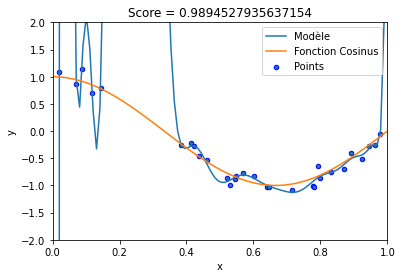

In [ ]:
x = X[:, np.newaxis] # changement de dimension (30,) à (30, 1)

polynomial_features = PolynomialFeatures(degree=20,
                                         include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])
pipeline.fit(x, y)
scores = pipeline.score(x, y)

# Générer les y avec le modèle appris
x_test = np.linspace(0, 1, 100)[:, np.newaxis]
plt.plot(x_test, pipeline.predict(x_test), label="Modèle")

# Les vrais y selon la fonction originale
plt.plot(x_test, cosinus(x_test), label="Fonction Cosinus")

plt.scatter(X, y, edgecolor='b', s=20, label="Points")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Score = {}".format(
    scores.mean()))
plt.show()

Le score est très bon : en effet le polynome appris passe bien par tous les points d'entrainement bleu. Cependant, on est loin d'avoir appris la bonne distribution originale du cosinus. 

**EXERCICES**
1. Dans la cellule python *ci-dessous*, codez une regression polynomiale avec les bons paramètres qui épouse correctement la fonction recherchée
2. Dans la cellule texte ci-dessous, identifiez laquelle des solutions est 1) de l'overfitting 2) de l'underfitting et 3) la meilleure solution. Justifiez chacun de vos choix



In [ ]:
# REPONSE A L EXERCICE 1)

In [ ]:
# REPONSE A L EXERCICE 2)

## Classification

Nous attaquons désormais deux problèmes de classification. Pour chaque problème, le but est de trouver une droite ou un plan qui sépare la classe rouge de la bleue.

Vous pouvez utiliser n'importe quel outil de la libraire sklearn, attention cependant aux points suivants: 

1.   Il faut utiliser l'outil minimal pour résoudre le problème. Si le problème est linéairement séparable, un classifieur linéaire suffira.
2.   Il faut tester l'efficacité de votre classifieur avec un jeu de test (qui s'oppose au jeu d'entrainement). Il est donc judicieux de séparer les points qui vous sont disponibles en utilisant par exemple la fonction [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) de sklearn

Utilisez directement les cellules ci-dessous pour présenter vos solutions.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from matplotlib.colors import ListedColormap

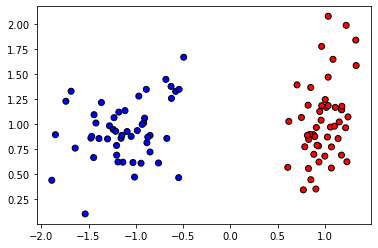

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']),
               edgecolors='k')
plt.show()



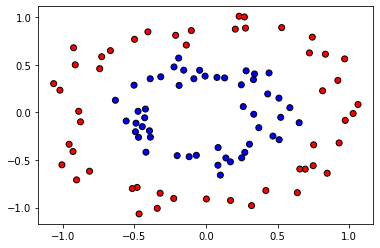

In [ ]:
X, y = make_circles(noise=0.1, factor=0.5, random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']),
               edgecolors='k')
plt.show()

